In [1]:
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('driving_log.csv', names=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])

In [3]:
df.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.615438


In [4]:
df.columns
print(len(df))

4053


In [5]:
type(df['center'])

pandas.core.series.Series

In [6]:
cols = ['center', 'left', 'right']
df[cols] = df[cols].apply(lambda col: col.str.replace(r"C:\\Users\\Amer\\Desktop\\new_track", "."))
df[cols] = df[cols].apply(lambda col: col.str.replace(r"\\", "/"))

In [7]:
df.head()

,center,left,right,steering,throttle,reverse,speed
0,./IMG/center_2018_07_16_17_11_43_382.jpg,./IMG/left_2018_07_16_17_11_43_382.jpg,./IMG/right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,./IMG/center_2018_07_16_17_11_43_670.jpg,./IMG/left_2018_07_16_17_11_43_670.jpg,./IMG/right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,./IMG/center_2018_07_16_17_11_43_724.jpg,./IMG/left_2018_07_16_17_11_43_724.jpg,./IMG/right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,./IMG/center_2018_07_16_17_11_43_792.jpg,./IMG/left_2018_07_16_17_11_43_792.jpg,./IMG/right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,./IMG/center_2018_07_16_17_11_43_860.jpg,./IMG/left_2018_07_16_17_11_43_860.jpg,./IMG/right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [8]:
df.to_csv(r'.\driving_log.csv', header=False, index=False)

In [9]:
df.head()

,center,left,right,steering,throttle,reverse,speed
0,./IMG/center_2018_07_16_17_11_43_382.jpg,./IMG/left_2018_07_16_17_11_43_382.jpg,./IMG/right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,./IMG/center_2018_07_16_17_11_43_670.jpg,./IMG/left_2018_07_16_17_11_43_670.jpg,./IMG/right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,./IMG/center_2018_07_16_17_11_43_724.jpg,./IMG/left_2018_07_16_17_11_43_724.jpg,./IMG/right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,./IMG/center_2018_07_16_17_11_43_792.jpg,./IMG/left_2018_07_16_17_11_43_792.jpg,./IMG/right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,./IMG/center_2018_07_16_17_11_43_860.jpg,./IMG/left_2018_07_16_17_11_43_860.jpg,./IMG/right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


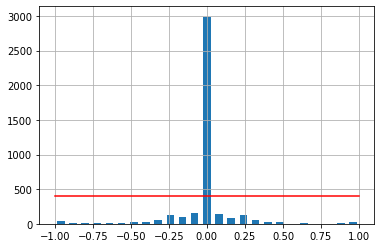

In [10]:
num_bins = 25
sample_limit = 400
hist,bins = np.histogram(df['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center,hist , width=0.05)
plt.grid(axis='both')
plt.plot((np.min(df['steering']), np.max(df['steering'])), (sample_limit, sample_limit), color='r')

total data:  4053
removed:  2590
remaining:  1463


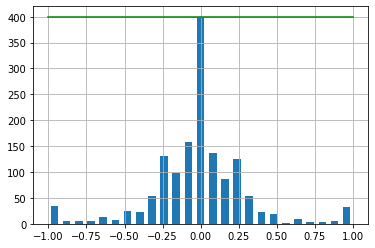

In [11]:
print('total data: ', len(df))
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(df['steering'])):
        if (df['steering'][i] >= bins[j] and df['steering'][i] <= bins[j+1]):
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[sample_limit:]
    remove_list.extend(list_)
print('removed: ', len(remove_list))
df.drop(df.index[remove_list], inplace = True)
print('remaining: ' , len(df))
            
hist,_ = np.histogram(df['steering'],num_bins)
plt.bar(center,hist , width = 0.05)
plt.grid(axis = 'both')
plt.plot((np.min(df['steering']),np.max(df['steering'])), (sample_limit,sample_limit), color = 'g')

In [12]:
df.to_csv(r'.\driving_log.csv', header=False, index=False)